# Transform user into vector space

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data 

We'll build a small program to generate a sample dataset of user that has schema below:
```
Wallet Address | Transaction Count | Transaction Volume | Avg Transaction Value | Transaction Frequency | Asset Diversity | Liquidity Provision | Staking Activity | Yield Farming Participation | Borrowing Value | Borrowing Frequency | Lending Value | Lending Frequency | Active Periods| Transaction Recency | Historical Activity Trends
```



In [2]:
import random
import string

def random_wallet_address():
    return "0x" + ''.join(random.choices(string.ascii_letters + string.digits, k=40))

def random_time_frame():
    return random.choice(['Daily', 'Weekly', 'Bi-weekly', 'Monthly', 'Never'])

def random_activity_trend():
    return random.choice(['Increasing', 'Stable', 'Decreasing'])

def random_active_periods():
    periods = [
        'Weekdays 10am-4pm', 'Weekdays 6pm-10pm', 'Weekdays 9am-5pm', 
        'Weekdays 7am-9am', 'Weekends 1pm-5pm', 'Weekends 8pm-12am',
        'Weekends 6pm-10pm', 'Weekdays 11am-3pm', 'Weekends 10am-2pm'
    ]
    return random.choice(periods)

# Generate 100 records
data = []
for _ in range(100):
    record = {
        "Wallet Address": random_wallet_address(),
        "Transaction Count": random.randint(10, 200),
        "Transaction Volume": random.randint(1000, 50000),
        "Avg Transaction Value": random.randint(200, 300),
        "Transaction Frequency": random_time_frame(),
        "Asset Diversity": random.randint(1, 10),
        "Liquidity Provision": random.randint(1000, 20000),
        "Staking Activity": random.randint(500, 10000),
        "Yield Farming Participation": random.randint(0, 15000),
        "Borrowing Value": random.randint(0, 5000),
        "Borrowing Frequency": random_time_frame(),
        "Lending Value": random.randint(0, 7000),
        "Lending Frequency": random_time_frame(),
        "Active Periods": random_active_periods(),
        "Transaction Recency": random.choice(["1 day ago", "2 days ago", "3 days ago", "1 week ago", "2 weeks ago", "1 month ago"]),
        "Historical Activity Trends": random_activity_trend()
    }
    data.append(record)

df = pd.DataFrame(data=data)
df.head(10)


Wallet Address  Transaction Count  \
0  0x9a1cz66EaIPXFnC0291leMurpwx3Dkaem3FVZS97                 89   
1  0x585hsfDdl5fCQVoxM1AuXG9rsIR8Ea2ND5a6Nzxa                 65   
2  0xUAHZo904CLasJQ6VyKgIul2k6XACRjwXSqpd3quX                163   
3  0xtnM77BNyR5TXcuIq6eH8Lu3T2JNITYKHCXEEi2ym                193   
4  0xhkJlSks9LJePhv8r2JLUj3u6pvGtCvc2oTygUScw                185   
5  0x2RbDfIVd0YrhRYmIjqnPl6z4cYezTjBHZQlv0G4W                 83   
6  0xNul7RRsWsHCcvzqZ6OxQe5GStspnPFPD3WRh6G1E                100   
7  0xA1aDFbxVLbp7838TlTaTq7KoqMQ3GAmpgkcWKoRD                 53   
8  0xMmQb2LDF7F3TOuuk6h0feiKQgcu96BsxZe0jXvcf                 34   
9  0xqrKSbK88BH1qZ5baiapjOuTlIRvlYGLX1Cf3pXKb                 81   

   Transaction Volume  Avg Transaction Value Transaction Frequency  \
0               19246                    231                 Never   
1               48666                    294               Monthly   
2               49993                    264                 Never   
3                7002                    242                 Daily   
4               33355                    233                 Never   
5               38384                    290                 Daily   
6               42719                    253                Weekly   
7               37484                    293                Weekly   
8               27067                    224             Bi-weekly   
9               22706                    229                 Daily   

   Asset Diversity  Liquidity Provision  Staking Activity  \
0               10                14539              5942   
1               10                 2640              3203   
2                1                13385              9738   
3                5                 9099              9980   
4                6                13782              4142   
5                4                13251              3174   
6                7                13541              2209   
7                3                 6088              9829   
8                9                 3198               589   
9                1                 2743              5349   

   Yield Farming Participation  Borrowing Value Borrowing Frequency  \
0                         3199              171              Weekly   
1                         9317             1228             Monthly   
2                         6229             3547              Weekly   
3                          521              214           Bi-weekly   
4                          523             3547              Weekly   
5                         4283             2565           Bi-weekly   
6                         9811              566               Never   
7                          714              604               Daily   
8                         2788             3607           Bi-weekly   
9                         4783             3509              Weekly   

   Lending Value Lending Frequency     Active Periods Transaction Recency  \
0            847         Bi-weekly  Weekends 6pm-10pm         2 weeks ago   
1           3981             Never  Weekends 10am-2pm          3 days ago   
2           3800           Monthly  Weekends 10am-2pm          3 days ago   
3           6871             Daily  Weekends 6pm-10pm           1 day ago   
4           6365         Bi-weekly  Weekdays 6pm-10pm           1 day ago   
5            760             Never  Weekdays 11am-3pm         2 weeks ago   
6           1326           Monthly   Weekdays 9am-5pm          1 week ago   
7           2159           Monthly   Weekends 1pm-5pm          2 days ago   
8           6272         Bi-weekly   Weekdays 9am-5pm         1 month ago   
9            718             Daily   Weekdays 9am-5pm          3 days ago   

  Historical Activity Trends  
0                     Stable  
1                 Increasing  
2                 Decreasing  
3                     Stable  
4                 Decreasing  
5                     S

# Transform user to vector 

$$u_i = f(x_i)$$

$f$:is a transform function.

$x_i$: is a features set of user.

$u_i$: is a vector of specific user.

In [3]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


def transform_function(df):

    ordinal_features = ["Transaction Frequency", "Historical Activity Trends", "Transaction Recency"]
    ordinal_encoder = OrdinalEncoder(categories=[["Never", "Monthly", "Bi-weekly", "Weekly", "Daily"], ["Decreasing", "Stable", "Increasing"], ["1 day ago", "2 days ago", "3 days ago", "1 week ago", "2 weeks ago", "1 month ago"]])
    df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

    onehot_features = ["Active Periods"]
    onehot_encoder = OneHotEncoder()
    onehot_encoded = onehot_encoder.fit_transform(df[onehot_features]).toarray()
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_features))

    df = pd.concat([df.drop(columns=["Wallet Address", "Active Periods"]), onehot_encoded_df], axis=1)
    return df 

df = transform_function(df)


Transaction Count  Transaction Volume  Avg Transaction Value  \
0                 89               19246                    231   
1                 65               48666                    294   
2                163               49993                    264   
3                193                7002                    242   
4                185               33355                    233   

   Transaction Frequency  Asset Diversity  Liquidity Provision  \
0                    0.0               10                14539   
1                    1.0               10                 2640   
2                    0.0                1                13385   
3                    4.0                5                 9099   
4                    0.0                6                13782   

   Staking Activity  Yield Farming Participation  Borrowing Value  \
0              5942                         3199              171   
1              3203                         9317             1228   
2              9738                         6229             3547   
3              9980                          521              214   
4              4142                          523             3547   

  Borrowing Frequency  ...  Historical Activity Trends  \
0              Weekly  ...                         1.0   
1             Monthly  ...                         2.0   
2              Weekly  ...                         0.0   
3           Bi-weekly  ...                         1.0   
4              Weekly  ...                         0.0   

  Active Periods_Weekdays 10am-4pm  Active Periods_Weekdays 11am-3pm  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   Active Periods_Weekdays 6pm-10pm  Active Periods_Weekdays 7am-9am  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               0.0                              0.0   
4                               1.0                              0.0   

   Active Periods_Weekdays 9am-5pm  Active Periods_Weekends 10am-2pm  \
0                              0.0                               0.0   
1                              0.0                               1.0   
2                              0.0                               1.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   Active Periods_Weekends 1pm-5pm  Active Periods_Weekends 6pm-10pm  \
0                              0.0                               1.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               1.0   
4                              0.0                               0.0   

   Active Periods_Weekends 8pm-12am  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0  

[5 rows x 23 columns]

In [13]:
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None

df = df.drop(columns=['Lending Frequency', 'Borrowing Frequency'])
df.head()

Transaction Count  Transaction Volume  Avg Transaction Value  \
0                 89               19246                    231   
1                 65               48666                    294   
2                163               49993                    264   
3                193                7002                    242   
4                185               33355                    233   

   Transaction Frequency  Asset Diversity  Liquidity Provision  \
0                    0.0               10                14539   
1                    1.0               10                 2640   
2                    0.0                1                13385   
3                    4.0                5                 9099   
4                    0.0                6                13782   

   Staking Activity  Yield Farming Participation  Borrowing Value  \
0              5942                         3199              171   
1              3203                         9317             1228   
2              9738                         6229             3547   
3              9980                          521              214   
4              4142                          523             3547   

   Lending Value  Transaction Recency  Historical Activity Trends  \
0            847                  4.0                         1.0   
1           3981                  2.0                         2.0   
2           3800                  2.0                         0.0   
3           6871                  0.0                         1.0   
4           6365                  0.0                         0.0   

   Active Periods_Weekdays 10am-4pm  Active Periods_Weekdays 11am-3pm  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   Active Periods_Weekdays 6pm-10pm  Active Periods_Weekdays 7am-9am  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               0.0                              0.0   
4                               1.0                              0.0   

   Active Periods_Weekdays 9am-5pm  Active Periods_Weekends 10am-2pm  \
0                              0.0                               0.0   
1                              0.0                               1.0   
2                              0.0                               1.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   Active Periods_Weekends 1pm-5pm  Active Periods_Weekends 6pm-10pm  \
0                              0.0                               1.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               1.0   
4                              0.0                               0.0   

   Active Periods_Weekends 8pm-12am  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0

# Similarity 

Assume we have a set of users that represented by matrix $P$ where each user is presented by vector $p$. Now, we want to list all of 
top (eg: 10) user that they are the most similar with user $p_i$.

From matrix $P$, we compute covariance matrix $Q$, that is formed:
$$
\begin{aligned}
Q = P \cdot P^T \\
\end{aligned}
$$

The, the similar score of $p_i$ will be $q_i$, to get the top similarity of $p_i$:
    $$top_i = argmax(q_i)$$

(we also ignore product $i$ in the top_i as itself similar score is 1)

<AxesSubplot:>

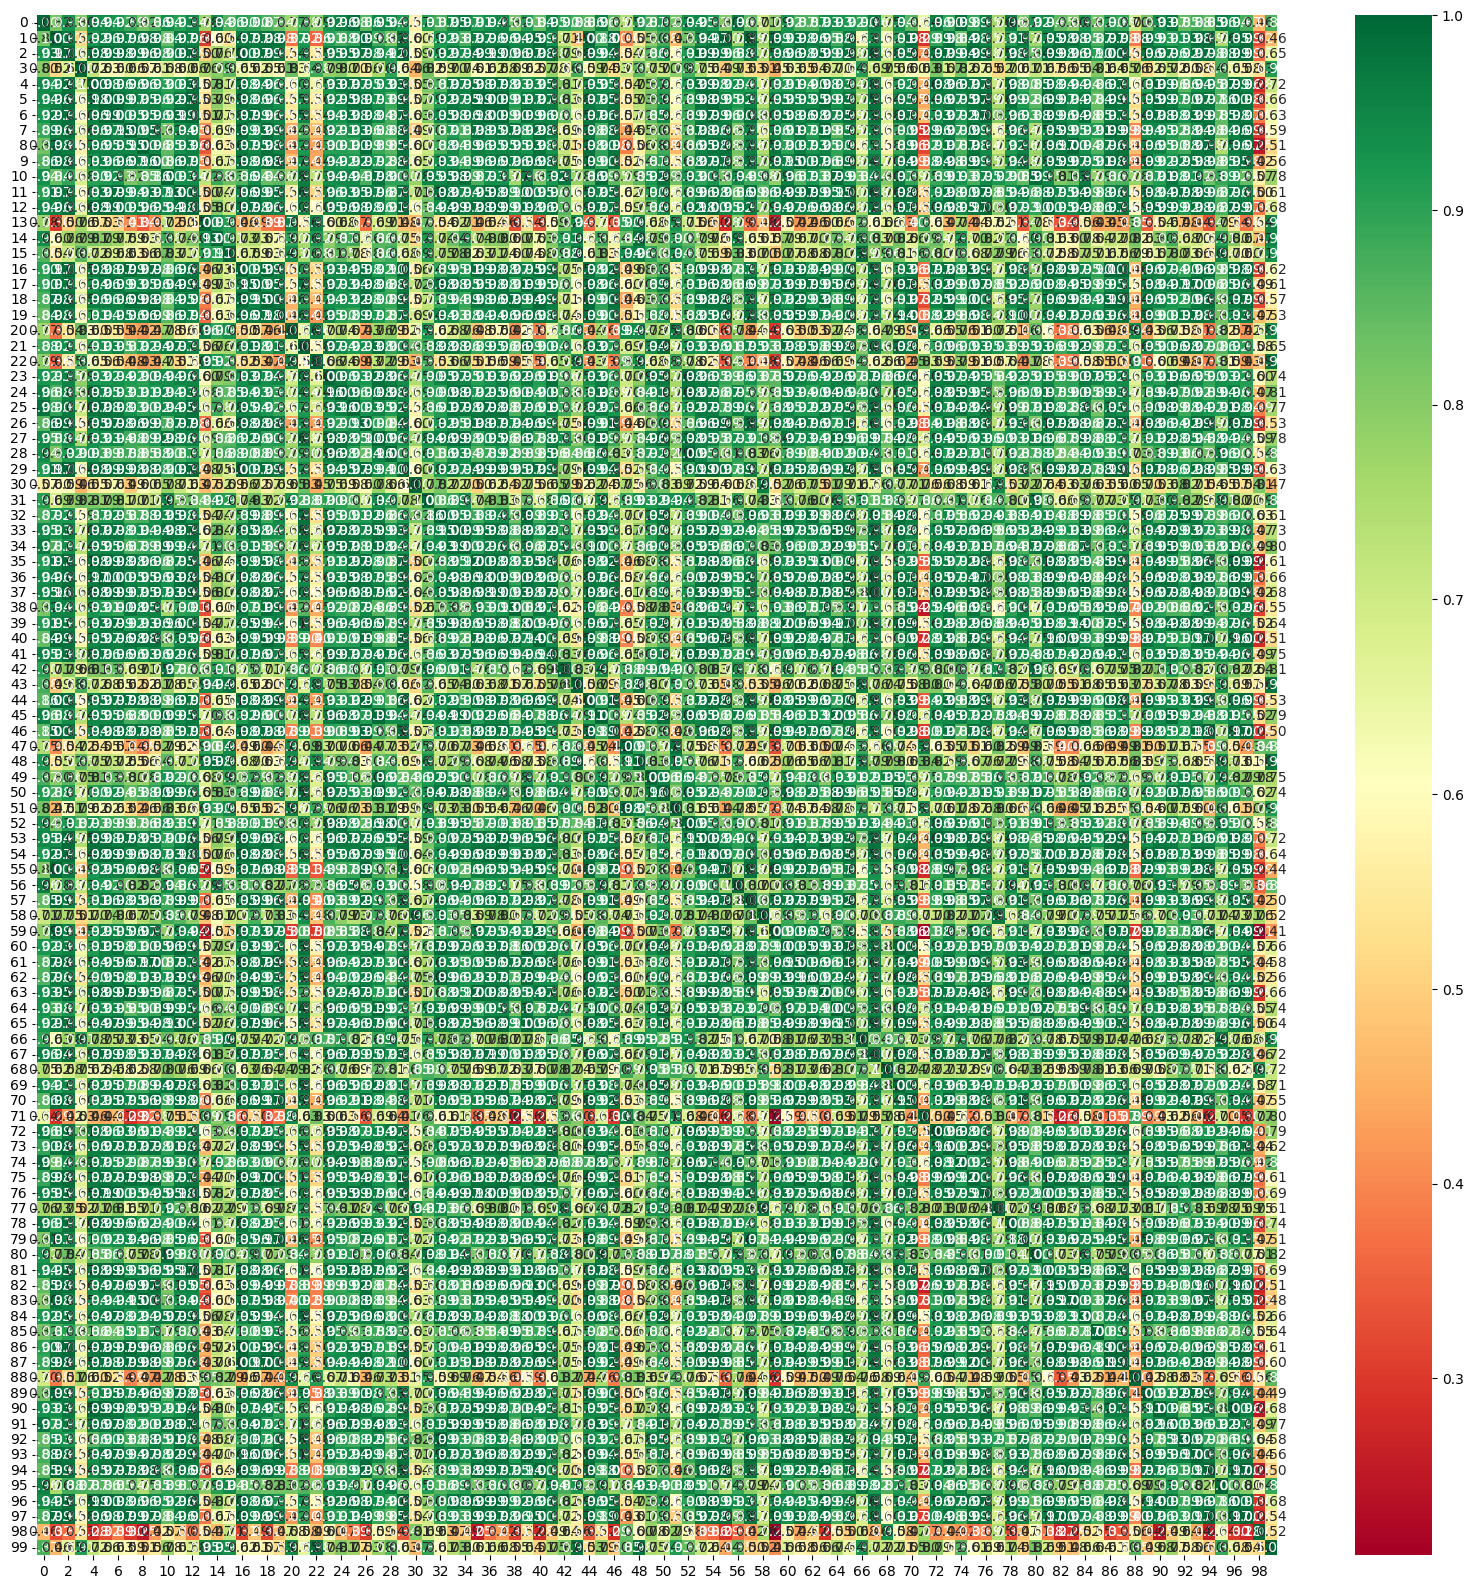

In [15]:
user_matrix = df.astype(float).to_numpy()

norm_products = user_matrix/np.linalg.norm(user_matrix, axis=1)[:, None]
Q = np.dot(norm_products, norm_products.T)

fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(Q, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

# Classification users

Implement simple classification on this data shows the highest participation in staking...

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming the data has already been prepared and encoded as in the previous steps

# Define high participation in staking as above the median
threshold = df['Staking Activity'].median()
df['High Staking Participation'] = (df['Staking Activity'] > threshold).astype(int)

# Features and target
X = df.drop(columns=['Staking Activity', 'High Staking Participation'])
y = df['High Staking Participation']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.20      0.29      0.24         7

    accuracy                           0.35        20
   macro avg       0.35      0.34      0.34        20
weighted avg       0.40      0.35      0.36        20

